In [1]:
import pandas as pd
from sklearn.datasets import make_classification

# Create a simple classification dataset
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Create a DataFrame to simulate a dataset with a 'label' column
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 6)])
data['label'] = y

# Save the dataset to a CSV file
data.to_csv('test_dataset.csv', index=False)

# Display the dataset
data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,label
0,-0.430668,0.672873,-0.724280,-0.539630,-0.651600,0
1,0.211646,-0.843897,0.534794,0.825848,0.681953,1
2,1.092675,0.409106,1.100096,-0.942751,-0.981509,0
3,1.519901,-0.773361,1.998053,0.155132,-0.385314,0
4,-0.453901,-2.183473,0.244724,2.591239,-0.484234,1


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4008 - loss: 0.7004
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5876 - loss: 0.6835
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8367 - loss: 0.6701
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9034 - loss: 0.6550
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9229 - loss: 0.6423
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9540 - loss: 0.6215
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9477 - loss: 0.6106
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9448 - loss: 0.5893
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9229 - loss: 0.5674
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9309 - loss: 0.5442  


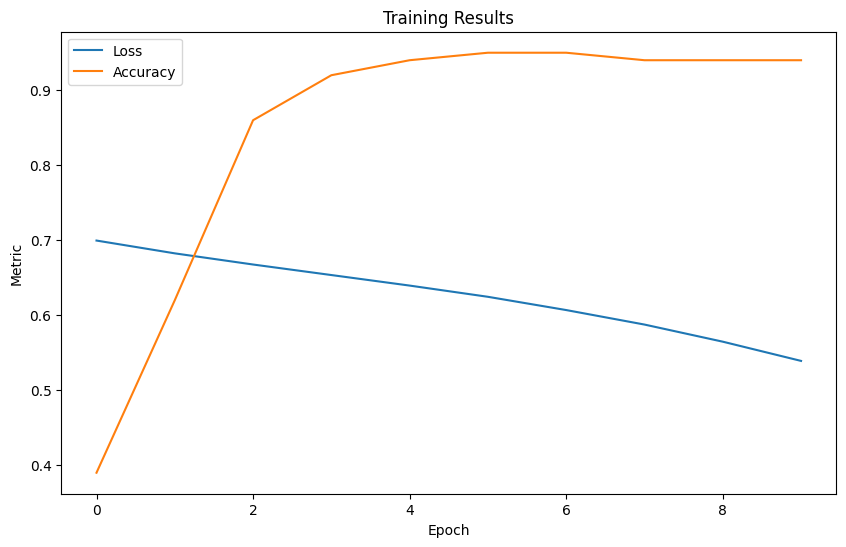

,accuracy,loss
0,0.39,0.699554
1,0.62,0.682492
2,0.86,0.667615
3,0.92,0.653573
4,0.94,0.639520


In [6]:
import pandas as pd
from train_model import build_model, compile_and_train_model, save_model_and_history

# Load the test dataset
data = pd.read_csv('test_dataset.csv')
X = data.drop('label', axis=1).values
y = data['label'].values

# User-defined configuration for testing
num_layers = 3  # For example, 3 layers
layer_configurations = [
    {'neurons': 64, 'activation': 'relu'},
    {'neurons': 32, 'activation': 'relu'},
    {'neurons': 16, 'activation': 'sigmoid'}
]
task_type = 'classification'  # Could also be 'regression'

# Step 1: Build the model
model = build_model(X, num_layers, layer_configurations, task_type)

# Step 2: Compile and train the model
model, history = compile_and_train_model(model, X, y, task_type, epochs=10, batch_size=32)

# Step 3: Save the model and history (optional, for testing purposes)
model_save_path, history_file = save_model_and_history(model, history, 'test_model')

# Print the history for validation
import matplotlib.pyplot as plt

# Convert the history to a pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Loss')
if 'accuracy' in history_df.columns:
    plt.plot(history_df['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Results')
plt.legend()
plt.show()

# Display the saved history file
history_df.head()